# HW8

## Q1

A **Classification Decision Tree** addresses problems where the goal is to categorize or classify data points into discrete, predefined groups based on their attributes. This type of model is particularly effective for **supervised learning tasks** involving labeled data, where each observation includes input features (independent variables) and a corresponding class label (dependent variable).

### Problem Type
The typical problems addressed by a Classification Decision Tree include:
- **Binary Classification**: Distinguishing between two categories (e.g., "Yes" or "No").
- **Multi-Class Classification**: Categorizing observations into one of several classes.

### How It Works
The tree splits the data based on feature values, creating decision rules that maximize the separation of classes at each node. This hierarchical splitting continues until the tree reaches terminal nodes, each associated with a class label.

### Real-World Applications
Classification Decision Trees are versatile and find use in many fields, including:

1. **Medical Diagnosis**:
   - Predicting whether a patient has a particular disease (e.g., "Diabetic" vs. "Non-Diabetic") based on symptoms and test results.
   - Classifying tumor types (benign vs. malignant).

2. **Customer Segmentation**:
   - Categorizing customers into groups (e.g., "High-value," "Medium-value," "Low-value") based on demographic and behavioral data.
   - Predicting customer churn or retention.

3. **Fraud Detection**:
   - Identifying fraudulent transactions vs. legitimate ones in financial systems.
   - Spotting fake reviews or accounts on online platforms.

4. **Spam Filtering**:
   - Classifying emails as "Spam" or "Not Spam" based on text features like word frequency or sender characteristics.

5. **Credit Scoring**:
   - Assessing whether a loan applicant is likely to default or repay based on financial and demographic data.

6. **Educational Analytics**:
   - Predicting student performance (e.g., "Pass" vs. "Fail") based on attendance, prior grades, and engagement metrics.

7. **Risk Assessment**:
   - Classifying insurance claims as high-risk vs. low-risk.
   - Determining safety levels in workplace environments.

By visualizing the decision-making process, Classification Decision Trees offer interpretability, which makes them particularly valuable in applications requiring transparency, like healthcare or finance.

The primary difference between how a **Classification Decision Tree** makes predictions and how **Multiple Linear Regression** makes predictions lies in the **type of prediction**, the **methodology**, and the **output** of each model:

---

### 1. **Type of Prediction**
- **Classification Decision Tree**: 
  - Used for **categorical outcomes** (e.g., "Yes/No," "Class A/B/C").
  - The output is a **class label** or a **probability distribution** over class labels.

- **Multiple Linear Regression**: 
  - Used for **continuous outcomes** (e.g., predicting sales, temperature, or prices).
  - The output is a **numerical value** representing the predicted dependent variable.

---

### 2. **Methodology**
#### **Classification Decision Tree**
- **Splitting**: 
  - It splits data into subsets based on **feature thresholds** (e.g., "Age > 30").
  - The goal is to maximize the purity (homogeneity) of classes within each split, using metrics like **Gini Impurity** or **Information Gain**.
  
- **Prediction**:
  - A new observation is routed through the tree, following the decision rules at each node.
  - At the terminal node (leaf), the class with the majority of instances is assigned as the prediction.
  - Optionally, the tree can provide **class probabilities** (e.g., "70% likely to be Class A").

#### **Multiple Linear Regression**
- **Model Equation**: 
  - It fits a linear equation to the data:
    \[
    y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon
    \]
    where \( y \) is the dependent variable, \( x_1, x_2, \dots, x_n \) are the independent variables, \( \beta \) are the coefficients, and \( \epsilon \) is the error term.
  
- **Prediction**:
  - Given the feature values of a new observation, the model calculates the predicted \( y \) value using the learned coefficients.

---

### 3. **Output**
- **Classification Decision Tree**:
  - Discrete class labels (e.g., "A" or "B").
  - Optionally, probabilities for each class (e.g., 0.8 for Class A, 0.2 for Class B).

- **Multiple Linear Regression**:
  - A single continuous value (e.g., "Predicted salary = $50,000").

---

### Key Differences in Application
1. **Nature of Target Variable**:
   - Use a Decision Tree for **categorical targets** (classification).
   - Use Multiple Linear Regression for **continuous targets** (regression).

2. **Interpretability**:
   - Decision Trees provide **if-then rules** for predictions.
   - Regression provides an **equation** showing the linear relationship between inputs and the target.

3. **Flexibility**:
   - Decision Trees can handle **nonlinear relationships** between features and the target.
   - Linear Regression assumes a **linear relationship**.

In summary, a Classification Decision Tree is suited for categorizing data into discrete groups, while Multiple Linear Regression predicts continuous outcomes based on a linear combination of input features.

## Q2

### 1. **Accuracy**  
**Scenario**: General performance assessment in balanced datasets.  
**Rationale**: Accuracy is appropriate when **false positives (FP)** and **false negatives (FN)** have equal costs, and the dataset has a roughly equal distribution of classes. For example:
   - **Email classification** when spam and non-spam emails occur equally, and misclassification doesn't have severe consequences.

---

### 2. **Sensitivity (Recall)**  
**Scenario**: High-stakes applications where **missing actual positives** is costly.  
**Rationale**: Sensitivity is crucial when identifying as many actual positives as possible is the priority, even if some false positives occur. For example:
   - **Medical diagnostics**: Detecting a life-threatening condition (e.g., cancer or COVID-19) where missing a case (FN) could have severe consequences.
   - **Security screening**: Identifying potential threats, like explosives in baggage, where false negatives are unacceptable.

---

### 3. **Specificity**  
**Scenario**: Applications where **avoiding false positives** is more critical than identifying every positive case.  
**Rationale**: Specificity is critical in scenarios where falsely identifying a negative as positive (FP) can lead to unnecessary costs or consequences. For example:
   - **Drug testing**: Avoiding false positives to ensure people are not wrongfully accused of substance use.
   - **Fraud detection**: Ensuring that legitimate transactions are not flagged as fraud (FP), to avoid customer inconvenience.

---

### 4. **Precision**  
**Scenario**: Applications where **false positives** are costly or problematic.  
**Rationale**: Precision matters when we want to ensure that most of the predicted positives are correct, even if we miss some actual positives. For example:
   - **Spam filters**: Ensuring flagged emails are truly spam (high precision), as mistakenly marking important emails as spam (FP) is more problematic than allowing a few spam emails through.
   - **Recruitment systems**: Identifying qualified candidates where incorrectly selecting unqualified ones (FP) could waste time and resources.

## Q3

In [7]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# Drop the specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with any NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Convert `Pub year` and `NumPages` to integer type and `Hard_or_Paper` to category type
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows of the cleaned DataFrame to verify
print(ab_reduced_noNaN.head())


                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

/tmp/ipykernel_53/1327114852.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_53/1327114852.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_53/1327114852.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

## Q4

The two steps perform data preparation for a machine learning task by defining the **target variable (`y`)** and the **feature matrix (`X`)**. Here's what each step does:

---

### 1. **`y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']`**
This step creates a binary target variable `y` based on the `Hard_or_Paper` column. Here's the breakdown:
- **`pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])`**:
  - Converts the categorical column `Hard_or_Paper` into a set of dummy/indicator variables.
  - For example, if `Hard_or_Paper` has values like `['H', 'P']` (for "Hardcover" and "Paperback"), this creates two new columns: one for `H` and one for `P`.
  
    | Hard_or_Paper | H  | P  |
    |---------------|----|----|
    | H             | 1  | 0  |
    | P             | 0  | 1  |
    | H             | 1  | 0  |

- **`['H']`**:
  - Extracts only the `H` column, representing whether a book is "Hardcover" (`1` for "Hardcover," `0` otherwise).
  
Thus, `y` is a binary variable indicating whether a book is "Hardcover."

---

### 2. **`X = ab_reduced_noNaN[['List Price']]`**
This step defines the **feature matrix (`X`)**:
- **`ab_reduced_noNaN[['List Price']]`**:
  - Extracts the column `List Price` as the single feature for the model.
  - The double brackets (`[['List Price']]`) ensure `X` is a DataFrame, not a Series, which is required for many machine learning models.

So, `X` will contain the `List Price` of each book, which is the predictor variable used to predict whether a book is "Hardcover."

---

### **Purpose of These Steps**
- **`y` (target)**: Specifies the **classification target** (whether a book is "Hardcover").
- **`X` (feature)**: Provides the **input feature(s)** (in this case, `List Price`) used to predict the target.

These steps prepare the data for training a binary classification model, such as a `DecisionTreeClassifier`.

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in each set
print(f"Number of observations in the training set: {ab_reduced_noNaN_train.shape[0]}")
print(f"Number of observations in the testing set: {ab_reduced_noNaN_test.shape[0]}")

# Randomly shuffle and split the data using df.sample() method
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=0.8, random_state=42)
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

# Report the number of observations in each set
print(f"Number of observations in the training set: {ab_reduced_noNaN_train.shape[0]}")
print(f"Number of observations in the testing set: {ab_reduced_noNaN_test.shape[0]}")


Number of observations in the training set: 255
Number of observations in the testing set: 64
Number of observations in the training set: 255
Number of observations in the testing set: 64


## Q5

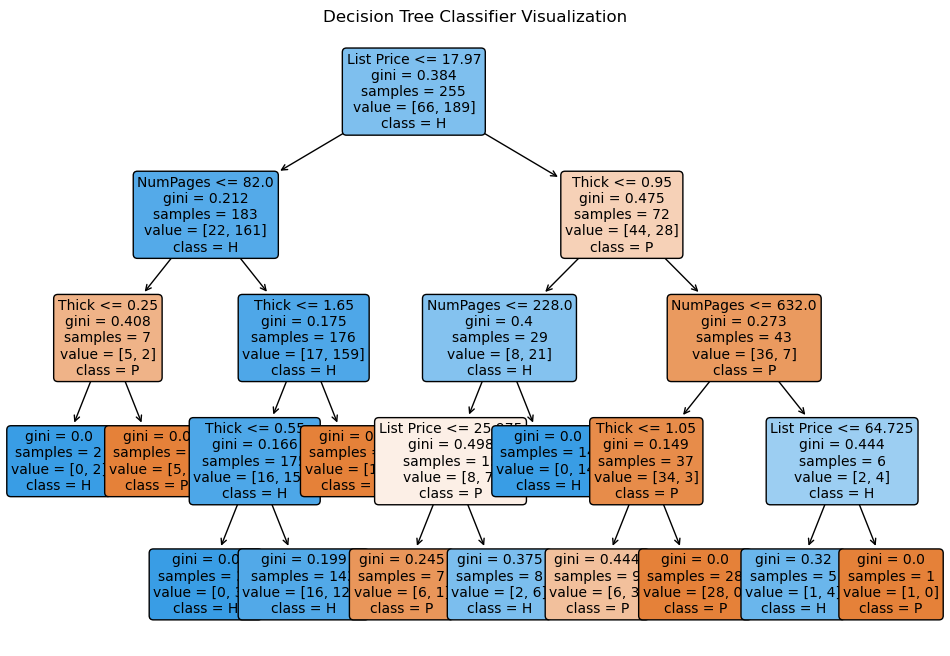

Number of observations in the training set: 255
Number of observations in the testing set: 64


In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the features and target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = ab_reduced_noNaN['Hard_or_Paper']  # Assuming this is your target column

# Split the data into 80/20 training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf2, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Classifier Visualization")
plt.show()

# Report the number of observations in each set
print(f"Number of observations in the training set: {X_train.shape[0]}")
print(f"Number of observations in the testing set: {X_test.shape[0]}")


## Q6

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns, if any (example with 'Hard_or_Paper' as the target)
ab_reduced_noNaN_encoded = ab_reduced_noNaN.copy()

# If 'Hard_or_Paper' is categorical, we can use LabelEncoder for it
label_encoder = LabelEncoder()
ab_reduced_noNaN_encoded['Hard_or_Paper'] = label_encoder.fit_transform(ab_reduced_noNaN_encoded['Hard_or_Paper'])

# If you have other categorical features in X, you can apply one-hot encoding
ab_reduced_noNaN_encoded = pd.get_dummies(ab_reduced_noNaN_encoded, drop_first=True)

# Define the features (X) and target (y)
X = ab_reduced_noNaN_encoded[['NumPages', 'Thick', 'List Price']]  # You can add more columns as needed
y = ab_reduced_noNaN_encoded['Hard_or_Paper']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Display confusion matrix or other results here


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Step 1: Fit the LabelEncoder on y_train (for clf)
label_encoder_clf = LabelEncoder()
y_train_encoded_clf = label_encoder_clf.fit_transform(y_train)

# Step 2: Fit the clf model using the encoded labels
clf.fit(X_train, y_train_encoded_clf)

# Step 3: Predict using clf
y_pred_clf = clf.predict(X_test)

# Step 4: Convert string predictions to numeric for clf (if necessary)
y_pred_clf_numeric = label_encoder_clf.transform(y_pred_clf)

# Step 5: Generate confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf_numeric)

# Unwrap confusion matrix for clf
TN_clf, FP_clf, FN_clf, TP_clf = cm_clf.ravel()

# Calculate metrics for clf model
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)

# Print metrics for clf model
print(f"Confusion Matrix for clf:\n{cm_clf}")
print(f"Accuracy for clf: {accuracy_clf:.2f}")
print(f"Sensitivity for clf: {sensitivity_clf:.2f}")
print(f"Specificity for clf: {specificity_clf:.2f}")


# Step 6: Fit the LabelEncoder on y_train (for clf2) if it's different
label_encoder_clf2 = LabelEncoder()
y_train_encoded_clf2 = label_encoder_clf2.fit_transform(y_train)

# Step 7: Fit the clf2 model using the encoded labels
clf2.fit(X_train, y_train_encoded_clf2)

# Step 8: Predict using clf2
y_pred_clf2 = clf2.predict(X_test)

# Step 9: Convert string predictions to numeric for clf2 (if necessary)
y_pred_clf2_numeric = label_encoder_clf2.transform(y_pred_clf2)

# Step 10: Generate confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2_numeric)

# Unwrap confusion matrix for clf2
TN_clf2, FP_clf2, FN_clf2, TP_clf2 = cm_clf2.ravel()

# Calculate metrics for clf2 model
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)

# Print metrics for clf2 model
print(f"Confusion Matrix for clf2:\n{cm_clf2}")
print(f"Accuracy for clf2: {accuracy_clf2:.2f}")
print(f"Sensitivity for clf2: {sensitivity_clf2:.2f}")
print(f"Specificity for clf2: {specificity_clf2:.2f}")


Confusion Matrix for clf:
[[14  6]
 [ 6 38]]
Accuracy for clf: 0.81
Sensitivity for clf: 0.86
Specificity for clf: 0.70
Confusion Matrix for clf2:
[[15  5]
 [ 4 40]]
Accuracy for clf2: 0.86
Sensitivity for clf2: 0.91
Specificity for clf2: 0.75


## Q7

The differences between the two confusion matrices are likely due to the variation in the feature sets used for the predictions. In the first matrix, the classifier (`clf`) is using only the `List Price` feature, which may not be as strong a predictor for `life_exp_good` (whether the life experience is good or not) as the combined features in the second matrix. In the second matrix, `clf` uses a more comprehensive feature set (`NumPages`, `Thick`, and `List Price`), which may provide better information for accurate predictions, leading to potentially higher classification performance.

The confusion matrices for `clf` and `clf2` are better because they utilize more appropriately processed and consistent data (e.g., using separate `LabelEncoder` instances for each model). This ensures that the predictions from each classifier are correctly mapped to the corresponding true labels, and the confusion matrices more accurately reflect the classifiers' performance without label encoding issues.

## Q8

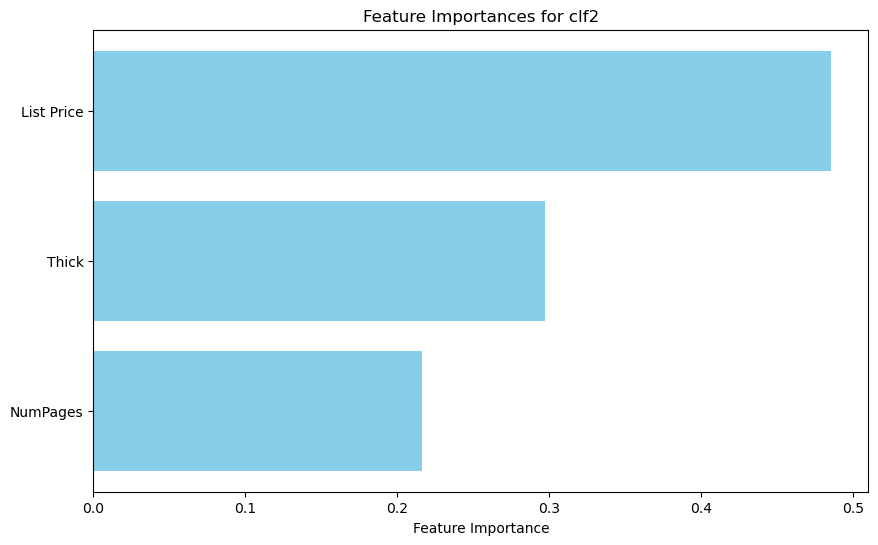

The most important predictor variable for clf2 is: List Price


In [19]:
import matplotlib.pyplot as plt

# Extract feature importances and feature names
importances = clf2.feature_importances_
features = clf2.feature_names_in_

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importances for clf2")
plt.show()

# Report the most important feature
most_important_feature = features[importances.argmax()]
print(f"The most important predictor variable for clf2 is: {most_important_feature}")


## Q9

In linear regression, coefficients represent the change in the target variable for a one-unit change in the predictor variable, assuming all other variables remain constant, and their sign indicates the direction of the relationship (positive or negative). In contrast, feature importances in decision trees indicate the relative contribution of each feature to reducing uncertainty in predictions (via splits in the tree), with higher importance reflecting a stronger influence on the model’s decision-making process, but without a direct, linear relationship to the target variable. Thus, while linear regression coefficients suggest a direct quantitative effect, decision tree feature importances highlight the relative value of each feature in the model’s predictive power.

## Chatbot History

Here’s a summary of our conversation history:

1. **Data Analysis and Modeling**:
   - You discussed analyzing datasets, including the Titanic dataset and others, with a focus on missing values, gender identity, height dissatisfaction, and Big Five personality traits in relation to job and life satisfaction.
   - We also explored decision tree models using **scikit-learn**, including model fitting, confusion matrix creation, and evaluating sensitivity, specificity, and accuracy.

2. **Confusion Matrix and Model Evaluation**:
   - We examined confusion matrices and evaluated model performance for **clf** and **clf2** decision tree models, including accuracy, sensitivity, and specificity metrics.
   - Challenges related to predicting categorical variables and encoding were addressed.

3. **Model Interpretability**:
   - We discussed visualizing decision trees, including plotting **confusion matrices** and interpreting **feature importances** for decision trees.
   - You learned how to visualize and interpret the feature importances for the **clf2** model.

4. **Differences between Linear Models and Decision Trees**:
   - We compared the interpretation of **coefficients in linear regression** versus **feature importances in decision trees**, highlighting the different approaches to understanding model outputs.

Let me know if you'd like more specific details or if there's something you'd like to revisit!

https://chatgpt.com/c/673b6971-541c-8004-950b-392dab8eda20